# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [4]:
std = np.std(df)
mean = np.mean(df)
m_std_mean = pd.merge(left = std.rename('std'), right=mean.rename('mean'),left_index=True, right_index=True)
m_std_mean

,std,mean
temperature,0.730358,98.249231
heart_rate,7.034862,73.761538


In [5]:
df.shape

(130, 3)

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'heart_rate'}>]], dtype=object)

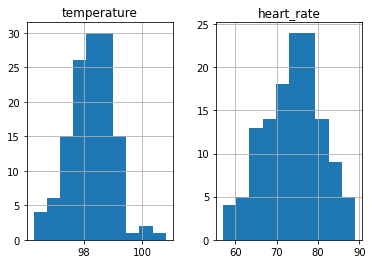

In [6]:
df.hist()

### Question 1

Text(0.5, 1.0, 'Box Plot')

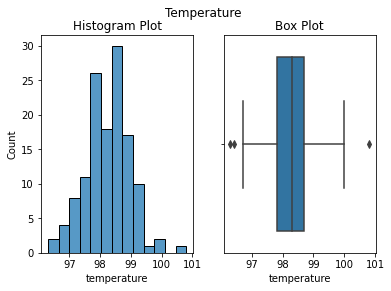

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt 

fig, axis = plt.subplots(1,2)
fig.suptitle("Temperature")
ax = sns.histplot(data = df['temperature'], ax = axis[0])
axis[0].set_title("Histogram Plot")
ax2 = sns.boxplot(x = df['temperature'], ax = axis[1])
axis[1].set_title("Box Plot")

From the box plot and histogram graph, the distribution of the temperature data seems normal<br>
I will now compute the p value from the scipy.stats library

In [8]:
from scipy.stats import normaltest
stat_nt, p_nt = normaltest(df['temperature'])
print('stat = %.3f, p = %.3f' % (stat_nt, p_nt))
if p_nt > 0.05:
    print('temperature distribution might be normal/Gaussian')
else:
    print('temperature distribution not might be normal/Gaussian')

stat = 2.704, p = 0.259
temperature distribution might be normal/Gaussian


In [9]:
from scipy.stats import shapiro
stat_sp, p_sp = shapiro(df['temperature'])
print('stat = %.3f, p = %.3f' % (stat_sp, p_sp))
if p_sp > 0.05:
    print('temperature distribution might be normal/Gaussian')
else:
    print('temperature distribution not might be normal/Gaussian')

stat = 0.987, p = 0.233
temperature distribution might be normal/Gaussian


From the aid of the computation, it seems the temperature data is normally distributed. <br>
The p value of data is over 0.05.<br>
The p value is the probability of obtaining test result data at least as extreme as the results of actual result in null hypothesis significance testing.<br>
Very small p values means extreme observed outcome would be very unlikely under null hypothesis.<br>
*extreme meaning data that is not very common<br>
It will be the 5% of the both end in the normal distribution (assuming significance level is 0.05.

### Question 2

In [10]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [11]:
df.shape

(130, 3)

It seems the sample only contains 130 data, so the size is less than 10% compaire to the entire population. Also, the temperature data is less than 10%, so it can be counted as independent.<br>
In order to have data as independent, the sample has to be less than 10% or if the data was taken with replacement.

### Question 3

bootstrap hypothesis test

In [12]:
import numpy as np

np.mean(df['temperature'])

98.24923076923078

98.24791161538462

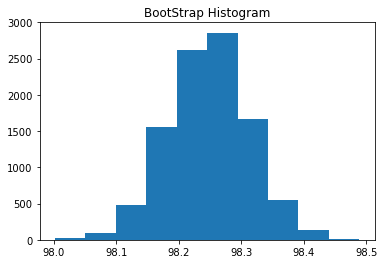

In [13]:
import numpy as np

temp_bootstrap = []

for i in range(10000):
    sample_n = np.random.choice(df['temperature'], size = 130)
    temp_bootstrap.append(sample_n.mean())
plt.hist(temp_bootstrap)
plt.title('BootStrap Histogram')
np.mean(temp_bootstrap)

Our null hypoesis is average body temperature is 98.6F<br>
Since average value is given for true population mean, t-value can be obtained.<br>
There is only one sample of dataset, so we will conduct with one-sample test

We will be using z test since the sample is more than 30

In [14]:
from statsmodels.stats.weightstats import ztest as ztest


ztest(df['temperature'], value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

z score = -5.4548 and p value is 4.9022e-08<br>
We reject null hypothesis since p value is below significance level.

In [15]:
import scipy.stats as stats

mean_temp = 98.6
stats.ttest_1samp(a = df['temperature'], popmean = mean_temp)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p value for T-test and Z-Test are different since Z-test are usually used for sample size above 30 and T-Test is used when sample size is below 30.

### Question 4

In [16]:
dfsample = df['temperature'].sample(n = 10)

Since the sample is less than 30, we will use t test.

In [17]:
import scipy.stats as stats

mean_temp = 98.6
stats.ttest_1samp(a = dfsample, popmean = mean_temp)

Ttest_1sampResult(statistic=-2.435436329370276, pvalue=0.03764538432371)

We reject null hypothesis since p value is below significance level.

In [18]:
ztest(dfsample, value = 98.6)

(-2.435436329370276, 0.014873841994845602)

The p-value for Z-Test and T-Test are not the same.<br>
I assume the reason is because of the number of sample is below 30 or not.<br>
If the number of sample is below 30 then T-Test will be sufficient to use.<br>
If the number of sample is above 30 then Z-Test will be sufficient to use.

### Question 5

Assuming significance level (alpha) is 95%

In [19]:
deg_free = df['temperature'].size - 1
sample_mean = df['temperature'].mean()
sample_std_error = stats.sem(df['temperature'])

stats.t.interval(alpha = 0.95, df = deg_free, loc = sample_mean, scale = sample_std_error)

(98.12200290560804, 98.37645863285351)

Abnormal temperature is below 98.122F and above 98.376F

### Question 6

In [20]:
df_m = df[df['gender'] == 'M']
df_fm = df[df['gender'] == 'F']
print("sample size of Male is :", df_m['temperature'].size)
print("sample size of Female is :", df_fm['temperature'].size)

sample size of Male is : 65
sample size of Female is : 65


The sample size is over 30. Therefore, we will use z test.<br>
Our null hypotheses is that the average of male and female are same.

In [21]:
ztests,pval = ztest(df_m['temperature'], df_fm['temperature'])
print(pval)
if(pval < 0.05):
    print("we can reject null hypothesis")
else:
    print("we failed to reject null hypothesis")

0.02228736076065755
we can reject null hypothesis


The average of male ad female are not the same.<br>
In conclustion, the average temperature of human body is not 98.6F since male and female are not the same.<br>
Also, we have another evidence that p value of z-test and p-test were below significance level, so we can reject null hypotheses.